### 토픽모델링

1. 토픽모델 : 토픽(문서의 단어분포)들이 있는 것
2. Author-Topic : LDA와 Author를 합친거 
                  저자에 대한 정보들을 추가해주고 단어의 분포를 추정한다
3. 저자별 문서분포와 단어의 분포를 추정 
4. 문서분포를 추정할때 어떤 저자의 정보를 추정하여 확률로 추정 
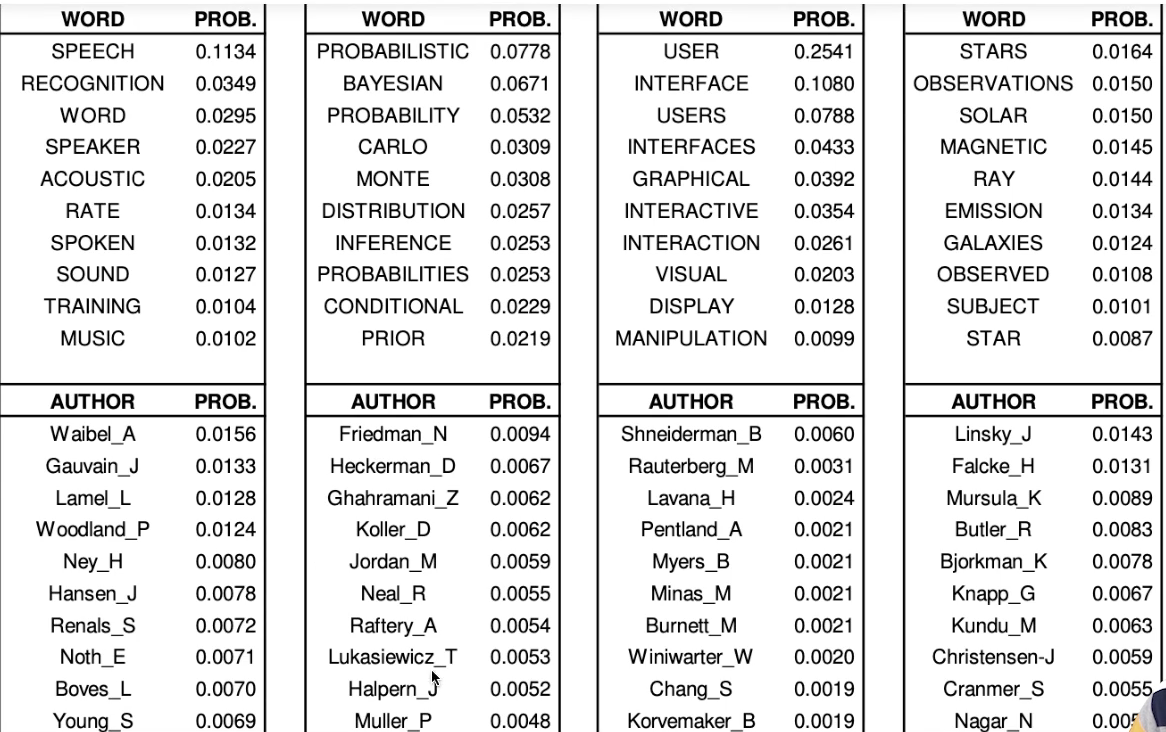
5. 이런걸 보면 토픽에 대한 저자들을 추정해주는 것을 볼 수 있다
6. 이걸로 누가 어떤 단어들을 많이 썻는지 알 수있다

In [1]:
import pandas as pd
import numpy as np
from pprint import pprint

import pickle

In [8]:
data = pd.read_csv('./data/cleaned_data1.csv')


In [9]:
data

,Date,User,Message
0,2019-01-19 21:49:12,미래투기꾼,26
1,2019-01-19 21:49:13,미래투기꾼,27
2,2019-01-19 21:49:15,미래투기꾼,28 집빈다
3,2019-01-19 21:49:24,미래투기꾼,근데 27일 일나가고
4,2019-01-19 21:49:30,미래투기꾼,28일 스케줄 모른다
...,...,...,...
7437,2020-04-16 02:54:19,미래투기꾼,사진
7438,2020-04-16 12:20:05,탈모르파티,사진
7439,2020-04-16 12:20:20,탈모르파티,3성이 무려5개
7440,2020-04-16 14:00:49,미래투기꾼,이제 아이디는 무조건 소방이네


In [13]:
authors = data.groupby('User')
pprint(authors.groups)
#groups를 사용하면 인덱스별로 묶인다

{'문경록': Int64Index([   8,    9,   10,   30,   35,   36,   39,   44,   45,   46,
            ...
            7383, 7384, 7387, 7390, 7416, 7417, 7419, 7420, 7422, 7423],
           dtype='int64', length=2328),
 '미래투기꾼': Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,   13,   14,
            ...
            7421, 7425, 7427, 7428, 7431, 7432, 7435, 7436, 7437, 7440],
           dtype='int64', length=3067),
 '탈모르파티': Int64Index([  11,   12,   16,   17,   22,   23,   24,   25,   26,   28,
            ...
            7413, 7424, 7426, 7429, 7430, 7433, 7434, 7438, 7439, 7441],
           dtype='int64', length=2047)}


In [14]:
# 위의 author가 int64index라서 list로 변환

author2doc = {}

for user, index in authors.groups.items():
    author2doc[user] = list(index)
    
print(author2doc)

{'문경록': [8, 9, 10, 30, 35, 36, 39, 44, 45, 46, 48, 51, 62, 66, 67, 71, 72, 75, 92, 96, 112, 113, 123, 125, 128, 131, 134, 135, 140, 147, 148, 165, 166, 174, 185, 186, 195, 196, 197, 200, 201, 204, 205, 206, 214, 231, 232, 236, 237, 238, 239, 241, 242, 250, 253, 256, 257, 258, 259, 260, 262, 263, 266, 267, 271, 272, 273, 283, 288, 289, 290, 294, 295, 296, 301, 304, 305, 309, 311, 314, 317, 318, 321, 327, 328, 335, 336, 341, 342, 345, 346, 347, 350, 351, 353, 354, 357, 360, 363, 364, 365, 366, 368, 373, 378, 379, 382, 383, 387, 388, 390, 392, 393, 394, 398, 400, 404, 405, 414, 415, 418, 419, 422, 423, 425, 426, 428, 433, 436, 437, 438, 441, 442, 443, 444, 447, 448, 450, 453, 454, 457, 461, 463, 464, 466, 467, 471, 472, 474, 479, 480, 486, 487, 488, 495, 496, 497, 502, 503, 504, 507, 508, 509, 511, 512, 516, 517, 521, 522, 525, 526, 529, 530, 532, 535, 547, 550, 552, 572, 577, 579, 587, 588, 594, 600, 601, 603, 606, 608, 610, 616, 617, 618, 621, 622, 627, 628, 630, 633, 634, 643, 645, 646